In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('framingham.csv')
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# EDA

In this section before creating the model, I will do some exploratory data analysis(Some Visualization) 

<AxesSubplot:xlabel='education', ylabel='count'>

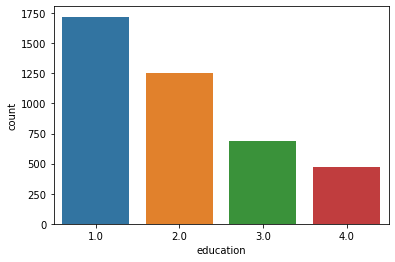

In [3]:
# creating a count plot to get a better understanding on the level of education of the participants.
sns.countplot(x='education',data=df)

Most participants seem to have some form of high school education. A fewer number of them have a diploma or went to college, and very few have a degree.



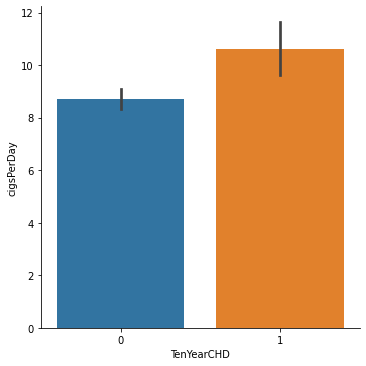

In [4]:
#(The risk factors) In the year 1960, smoking was said to increase the risk of CHD, Now we will visualize this relationship.
sns.catplot(x='TenYearCHD',y='cigsPerDay',kind='bar',data=df)

AS you see the patients who have a TenYearCHD, take risk of smoke more cigarettes per day than those who do not.

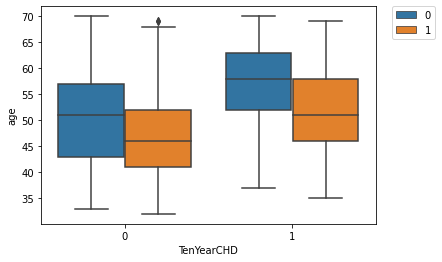

In [5]:
# In this line i will visualize if there is a relationship between age and the ten year risk of CHD.By using the category smoker.
sns.boxplot(x='TenYearCHD',y='age',hue='currentSmoker',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Noticed that the older patients are more likely to develop CHD.Smokers seem to be at a larger risk of developing CHD at a younger age, as compared to non-smokers.

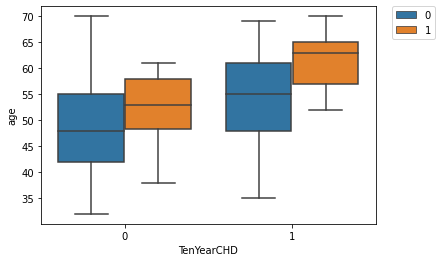

In [6]:
# Visualizing the relationship between age, prevalent stroke, and the ten year risk of developing CHD.
sns.boxplot(x='TenYearCHD',y='age',hue='prevalentStroke',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

It looks as though strokes are more prevalent in participants of an older age group.



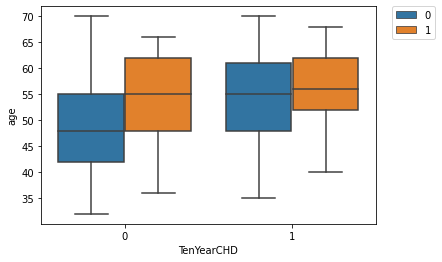

In [7]:
sns.boxplot(x='TenYearCHD',y='age',hue='diabetes',data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

it looks as though an older participant is more likely to have diabetes than a younger one.(Again)

(80.0, 725.45)

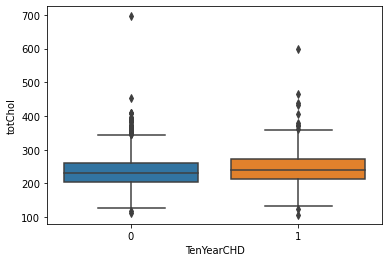

In [8]:
# The relation between the Cholesterol level and the risk of CHD
sns.boxplot(x='TenYearCHD',y='totChol',data=df)
plt.ylim(80)

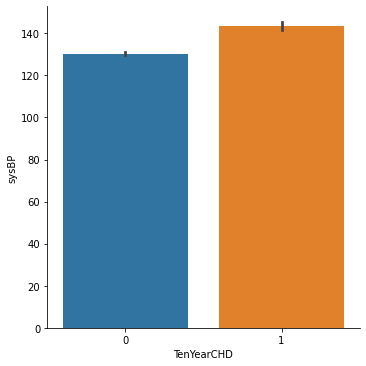

In [9]:
# Visualize the relation with tenYearCHD risk by both systolic and diastolic blood pressure
sns.catplot(x='TenYearCHD',y='sysBP',kind='bar',data=df)

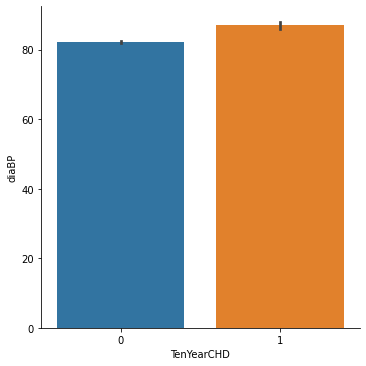

In [10]:
sns.catplot(x='TenYearCHD',y='diaBP',kind='bar',data=df)

It looks like the patients with a ten year CHD risk seem to have higher blood pressure than the ones who don't.

In the year 2002, obesity was found to be a risk factor in developing CHD. I will now take a look at the relationship between BMI and the ten year risk of CHD.



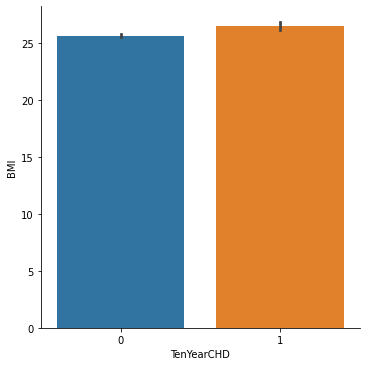

In [11]:
sns.catplot(x='TenYearCHD',y='BMI',kind='bar',data=df)

Patients with CHD have a little higher BMI than patients without.



In the year 1961, high BP was said to increase the risk of CHD. I will be taking a look at BP medications, and see if there is a relationship.



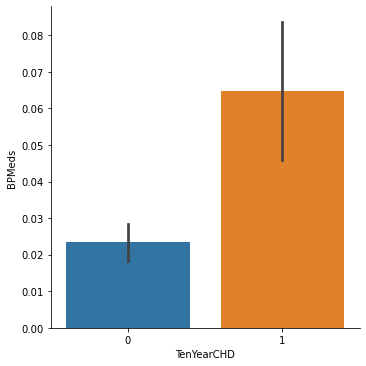

In [12]:
sns.catplot(x='TenYearCHD',y='BPMeds',kind='bar',data=df)

A higher dosage of BP medications is associated with a larger ten year CHD risk.



## Preprocessing

In [13]:
df.isnull().any()

male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [14]:
df = df.dropna()
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [15]:
df['TenYearCHD'].value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

In [16]:
# Baseline accuracy:
3101/(3101+557)

0.8477310005467469

The model to classify the ten year risk of CHD needs to perform better than the baseline.So, The model needs to beat the baseline accuracy of 0.85.



## Train-test split

In [17]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [18]:
X = df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']

In [19]:
X.shape

(3658, 15)

In [20]:
y.shape

(3658,)

In [21]:
clf = RandomForestClassifier()

In [22]:
clf.fit(X, y)

RandomForestClassifier()

In [23]:
print(clf.feature_importances_)

[0.02056401 0.12542464 0.03502802 0.01179674 0.05120836 0.00722395
 0.00280074 0.01851936 0.00649901 0.12275689 0.13804956 0.11541574
 0.12834756 0.09664562 0.11971979]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
X_train.shape, y_train.shape

((2926, 15), (2926,))

In [27]:
X_test.shape, y_test.shape

((732, 15), (732,))

In [34]:
y_hat = clf.predict(X_test)
print(y_hat)

[0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 

In [29]:
print(clf.score(X_test, y_test))

1.0


In [32]:
from sklearn.metrics import classification_report,accuracy_score

In [35]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       611
           1       1.00      1.00      1.00       121

    accuracy                           1.00       732
   macro avg       1.00      1.00      1.00       732
weighted avg       1.00      1.00      1.00       732



In [41]:
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.tree import DecisionTreeClassifier
# from imblearn.pipeline import Pipeline
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler

## Over and under-sampling

In [40]:
# oversample = RandomOverSampler(sampling_strategy='minority')
# X_over, y_over = oversample.fit_resample(X, y)
# X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size=0.35)

In [42]:
# steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
# pipeline = Pipeline(steps=steps)

In [43]:
# Fitting the data to the pipeline 
# pipeline.fit(X_train,y_train)

In [44]:
# pipepred = pipeline.predict(X_test)

## Evaluating the model

In [45]:
# from sklearn.metrics import classification_report,accuracy_score
# print(classification_report(y_test,pipepred))

In [46]:
# accuracy_score(y_test,pipepred)